In [1]:
import random
random.seed(version=2)
import matplotlib.pyplot as plt
import statistics

# Вывод карты

def printc(arr_2d):
    for arr in arr_2d:
        print("|", end = '')
        for el in arr:
            if el == None:
                print("  ", end = '|')
                
            elif el < 10: print(" " + str(el), end = "|")
            else:
                    print(str(el), end = '|') # end = '\n' - новая строка по умолчанию
        print()

In [2]:
# Создаем карту со случайными неповторяющимися числами от 1 до 90

def cr_card():

    card = [[None]*9 for i in range(3)]
    
    num_set = [[1]*10 for f in range(9)]

    k = 0
    for i in range(9):
        for j in range(10):
            num_set[i][j]= k
            k+=1

    num_set[0].remove(0)
    num_set[8].append(90)

    for i in range(len(card)):

        d = [g+1 for g in range(-1,8)]
        for m in range(4):
            d.remove(random.choice(d))

        for j in d:
            card[i][j]=random.choice(num_set[j])
            num_set[j].remove(card[i][j])
    
    return card

In [8]:
# Проверка на дубли в картах

def doubles (card1, card2):
    s = 0
    for arr in card1:
        for el in arr:
            if el != None:
                if el in card2[0] or el in card2[1] or el in card2[2]:
                    s += 1
    return s

# print("\n" + "Общих чисел: " + str(s))

In [5]:
# Игра по правилам "одна карта заполнена - выигрыш", играем партию
def l_round (card_1, card_2):
    
    bag = []
    for n in range(1, 91):
        bag.append(n)
    random.shuffle(bag) # Создали и перемешали мешок с бочонками
    
    e_card = [[None]*9 for i in range(3)]
    
    loto_r = 0  
    for v in range(90):
        w = bag.pop() # Вытаскиваем "последний бочонок" из мешка

# Вывод каждого раунда
#         print(loto_r, w)
#         printc(card_1)
#         print()
#         printc(card_2)
        
        #Остановка цикла: сравниваем текущее состояние обеих карт с "пустой" картой
        if card_1 == e_card or card_2 == e_card:
            break
        
        loto_r += 1
        
        #Закрываем цифры в картах
        for i in range(3):
            for j in range(9):

                if card_1[i][j] == w:
                    card_1[i][j] = None

                if card_2[i][j] == w:
                    card_2[i][j] = None
                
    return loto_r         

In [18]:
data = [[], []]
fr = [[] for i in range(6)]

for y in range(10000):
    card1 = cr_card()
    card2 = cr_card()

#     printc(card1)
#     print()
#     printc(card2)
    dbl = doubles(card1, card2)
    rnds = l_round(card1, card2)
        
    data[0].append(dbl)
    data[1].append(rnds)
    
    if dbl > 5:
        fr.append([])
    if dbl > 6:
        fr.append([])
        fr.append([])
        fr.append([])    
    
    fr[dbl].append(rnds)
# Получили данные range игр: последний ход(раунд) и количество дублей в картах

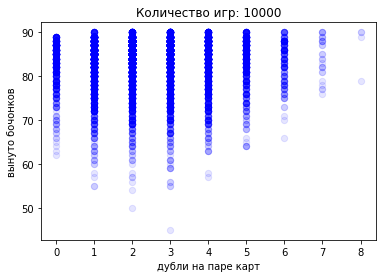

In [19]:
# В визуализации данных пока не разбираюсь

def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "b", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 40, color = color, alpha = 0.1)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title("Количество игр: " + str(len(data[1])))
    ax.set_xlabel("дубли на паре карт")
    ax.set_ylabel("вынуто бочонков")

scatterplot(data[0],data[1])

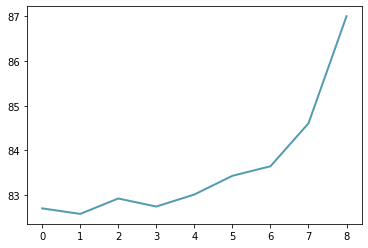

In [20]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
stat = [[],[]]

c = 0
for i in fr:
    if i == []:
        continue
    stat[0].append(c)
    stat[1].append(statistics.mean(i))
    c += 1
    
lineplot(stat[0],stat[1])